In [5]:
# let the statsmodels library to be consistent with latest pandas
!pip -q install --upgrade statsmodels

# allows us to print multiple outputs from a single Colab cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# load important libraries that we might use
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

# Increase viewable area of Pandas tables, numpy arrays, plots
pd.set_option('display.max_rows', 6, 'display.max_columns', 500, 'display.max_colwidth', 1, 'display.precision', 2)
np.set_printoptions(linewidth=10000, precision=4, edgeitems=20, suppress=True)
plt.rcParams['figure.figsize'] = [16, 6]

[SPX x GLD]

[F x GM]

[KO x Pep]

In [6]:
from google.colab import files
upload = files.upload()

Saving ^SPX.csv to ^SPX.csv
Saving F.csv to F.csv
Saving GLD.csv to GLD.csv
Saving GM.csv to GM.csv
Saving KO.csv to KO.csv
Saving PEP.csv to PEP.csv


SPX and GLD

In [9]:
df_SPX = pd.read_csv(open('^SPX.csv'))
df_SPX.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-14,3940.73,3961.94,3912.18,3946.01,3946.01,4293240000
1,2022-09-15,3932.41,3959.14,3888.28,3901.35,3901.35,4441830000
2,2022-09-16,3880.95,3880.95,3837.08,3873.33,3873.33,7954650000
3,2022-09-19,3849.91,3900.45,3838.50,3899.89,3899.89,3766850000
4,2022-09-20,3875.23,3876.01,3827.54,3855.93,3855.93,4058050000


In [33]:
df_SPX.corr()

<ipython-input-33-5d2098b3fee9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_SPX.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.00,1.00,1.00,0.99,0.99,-0.33
High,1.00,1.00,1.00,1.00,1.00,-0.32
Low,1.00,1.00,1.00,1.00,1.00,-0.35
Close,0.99,1.00,1.00,1.00,1.00,-0.33
Adj Close,0.99,1.00,1.00,1.00,1.00,-0.33
Volume,-0.33,-0.32,-0.35,-0.33,-0.33,1.00


In [10]:
df_GLD = pd.read_csv(open('GLD.csv'))
df_GLD.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-14,158.68,158.98,157.73,157.93,157.93,6091100
1,2022-09-15,156.76,157.49,154.62,154.98,154.98,13181200
2,2022-09-16,154.66,156.56,154.34,155.84,155.84,7141200
3,2022-09-19,154.87,156.04,154.82,155.96,155.96,5582800
4,2022-09-20,155.03,155.23,154.59,155.07,155.07,5943700


In [34]:
df_GLD.corr()

<ipython-input-34-ef9b978678c0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_GLD.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.00,1.00,1.00,1.00,1.00,0.24
High,1.00,1.00,1.00,1.00,1.00,0.27
Low,1.00,1.00,1.00,1.00,1.00,0.23
Close,1.00,1.00,1.00,1.00,1.00,0.26
Adj Close,1.00,1.00,1.00,1.00,1.00,0.26
Volume,0.24,0.27,0.23,0.26,0.26,1.00


<ipython-input-35-5ead723e3966>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  first_data.corr()
<ipython-input-35-5ead723e3966>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(first_data.corr(), annot = True);


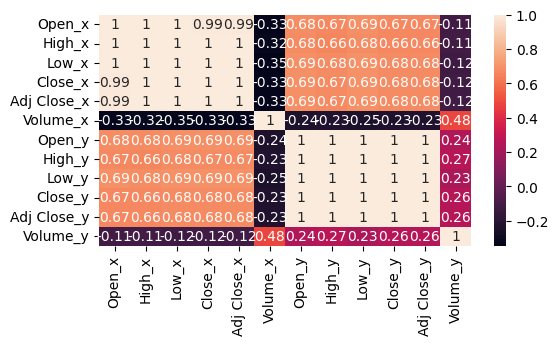

In [35]:
first_data = pd.merge(df_SPX, df_GLD, on='Date', how='inner')
first_data.corr()
plt.rcParams['figure.figsize'] = [6, 3];
sns.heatmap(first_data.corr(), annot = True);

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Scatter Plot for SPX & GLD')

Text(0.5, 0, 'SPX')

Text(0, 0.5, 'GLD')

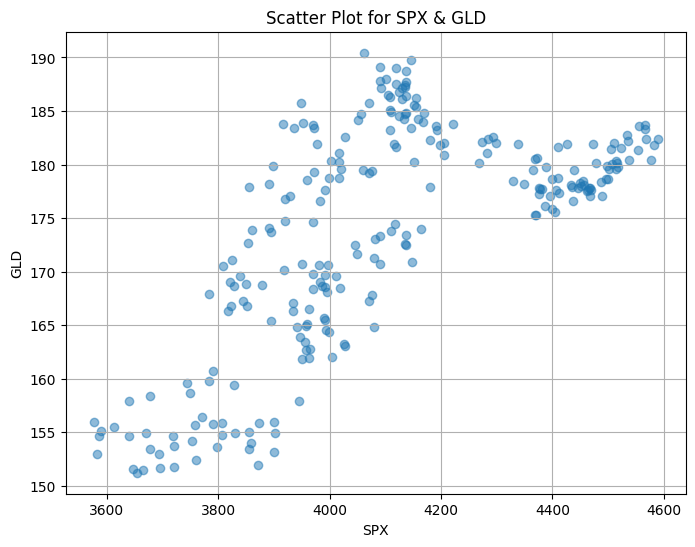

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(first_data['Adj Close_x'], first_data['Adj Close_y'], alpha=0.5)
plt.title("Scatter Plot for SPX & GLD")
plt.xlabel('SPX')
plt.ylabel('GLD')
plt.grid(True)
plt.show()

In [57]:
spx_close = df_SPX['Adj Close']
gld_close = df_GLD['Adj Close']

data = pd.DataFrame({'SPX': spx_close, 'GLD': gld_close})

data.corr()

data.cov()

,SPX,GLD
SPX,1.00,0.68
GLD,0.68,1.00


,SPX,GLD
SPX,66523.38,1830.71
GLD,1830.71,109.93


0.6769821632443761

In [56]:
spx_close.corr(gld_close)

0.6769821632443761

F and GM

In [37]:
df_F = pd.read_csv(open('F.csv'))
df_F.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-14,14.76,14.85,14.45,14.66,13.33,59571800
1,2022-09-15,14.69,15.21,14.68,14.89,13.54,61377000
2,2022-09-16,14.62,14.74,14.47,14.72,13.39,68454800
3,2022-09-19,14.50,14.96,14.49,14.93,13.58,48696200
4,2022-09-20,14.09,14.23,13.01,13.09,11.91,196340000


In [39]:
df_F.corr()

<ipython-input-39-f173d61e9a4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_F.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.00,0.99,0.99,0.97,0.88,-0.07
High,0.99,1.00,0.99,0.99,0.88,-0.05
Low,0.99,0.99,1.00,0.99,0.90,-0.15
Close,0.97,0.99,0.99,1.00,0.90,-0.12
Adj Close,0.88,0.88,0.90,0.90,1.00,-0.16
Volume,-0.07,-0.05,-0.15,-0.12,-0.16,1.00


In [38]:
df_GM = pd.read_csv(open('GM.csv'))
df_GM.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-14,40.74,40.85,39.74,40.62,40.21,15239200
1,2022-09-15,40.57,42.13,40.54,40.66,40.25,15193900
2,2022-09-16,40.06,40.57,39.71,39.97,39.57,20899600
3,2022-09-19,39.50,41.44,39.43,41.39,40.98,13267700
4,2022-09-20,40.23,40.60,38.90,39.06,38.67,25401500


In [40]:
df_GM.corr()

<ipython-input-40-b3f5ec18010f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_GM.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.00,0.99,0.99,0.98,0.97,0.05
High,0.99,1.00,0.99,0.99,0.99,0.08
Low,0.99,0.99,1.00,0.99,0.99,0.01
Close,0.98,0.99,0.99,1.00,1.00,0.04
Adj Close,0.97,0.99,0.99,1.00,1.00,0.03
Volume,0.05,0.08,0.01,0.04,0.03,1.00


<ipython-input-41-3cdaf7348986>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  second_data.corr()
<ipython-input-41-3cdaf7348986>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(second_data.corr(), annot = True);


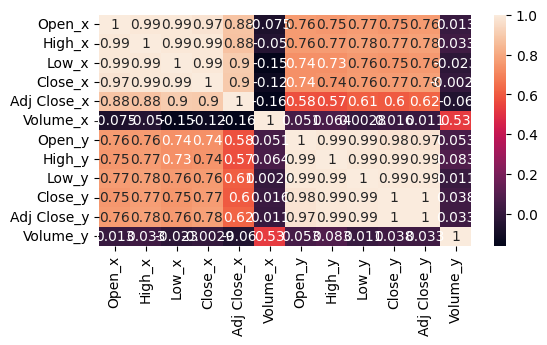

In [41]:
second_data = pd.merge(df_F, df_GM, on='Date', how='inner')
second_data.corr()
plt.rcParams['figure.figsize'] = [6, 3];
sns.heatmap(second_data.corr(), annot = True);

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Scatter Plot for F & GM')

Text(0.5, 0, 'F')

Text(0, 0.5, 'GM')

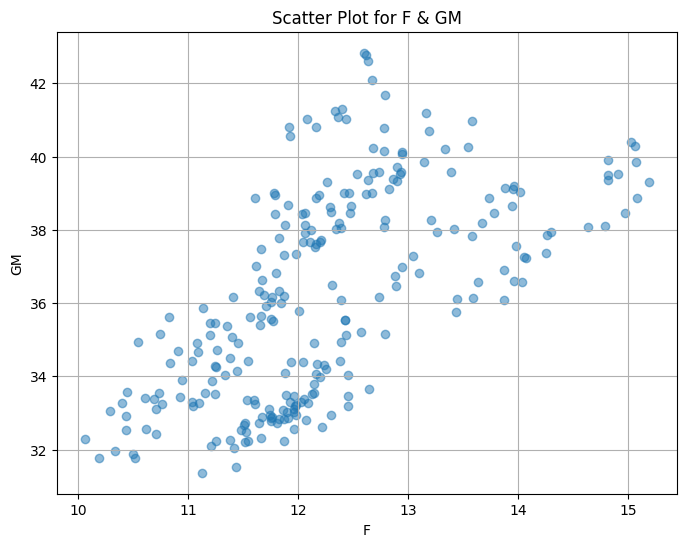

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(second_data['Adj Close_x'], second_data['Adj Close_y'], alpha=0.5)
plt.title("Scatter Plot for F & GM")
plt.xlabel('F')
plt.ylabel('GM')
plt.grid(True)
plt.show()

In [44]:
f_close = df_F['Adj Close']
gm_close = df_GM['Adj Close']

data = pd.DataFrame({'F': f_close, 'GM': gm_close})

data.corr()

data.cov()

,F,GM
F,1.00,0.62
GM,0.62,1.00


,F,GM
F,1.14,1.89
GM,1.89,8.07


In [58]:
f_close.corr(gm_close)

0.6220205038476048

KO and PEP

In [45]:
df_KO = pd.read_csv(open('KO.csv'))
df_KO.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-14,60.64,61.08,60.44,60.79,59.02,12881600
1,2022-09-15,60.40,60.40,59.36,59.53,58.22,11451900
2,2022-09-16,59.66,59.80,59.11,59.54,58.23,20493500
3,2022-09-19,59.39,60.10,59.23,59.99,58.67,12596200
4,2022-09-20,59.68,60.03,59.32,59.90,58.58,11984600


In [50]:
df_KO.corr()

<ipython-input-50-54d076fc5a97>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_KO.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.00,0.99,0.99,0.97,0.96,-0.26
High,0.99,1.00,0.99,0.99,0.96,-0.24
Low,0.99,0.99,1.00,0.99,0.98,-0.29
Close,0.97,0.99,0.99,1.00,0.98,-0.26
Adj Close,0.96,0.96,0.98,0.98,1.00,-0.27
Volume,-0.26,-0.24,-0.29,-0.26,-0.27,1.00


In [48]:
df_PEP = pd.read_csv(open('PEP.csv'))
df_PEP.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-14,168.12,169.19,167.57,168.68,164.20,5156900
1,2022-09-15,168.53,168.56,165.34,165.88,161.47,5461000
2,2022-09-16,166.36,167.17,165.25,166.97,162.53,12012600
3,2022-09-19,167.06,168.81,166.50,168.73,164.25,3720900
4,2022-09-20,167.58,169.15,166.86,168.92,164.43,3872000


In [49]:
df_PEP.corr()

<ipython-input-49-002d8f89906e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_PEP.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.00,0.99,0.99,0.98,0.97,-0.15
High,0.99,1.00,0.99,0.99,0.98,-0.12
Low,0.99,0.99,1.00,0.99,0.98,-0.17
Close,0.98,0.99,0.99,1.00,0.99,-0.14
Adj Close,0.97,0.98,0.98,0.99,1.00,-0.15
Volume,-0.15,-0.12,-0.17,-0.14,-0.15,1.00


<ipython-input-52-534a39e10775>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  third_data.corr()
<ipython-input-52-534a39e10775>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(third_data.corr(), annot = True);


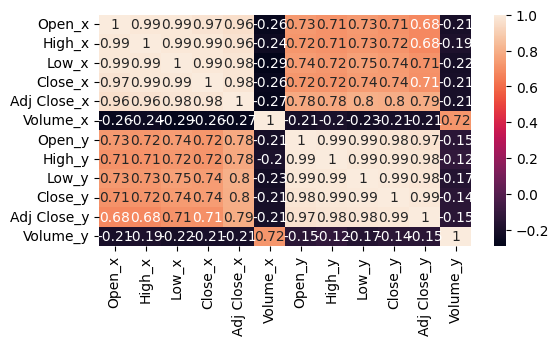

In [52]:
third_data = pd.merge(df_KO, df_PEP, on='Date', how='inner')
third_data.corr()
plt.rcParams['figure.figsize'] = [6, 3];
sns.heatmap(third_data.corr(), annot = True);

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Scatter Plot for KO & PEP')

Text(0.5, 0, 'KO')

Text(0, 0.5, 'PEP')

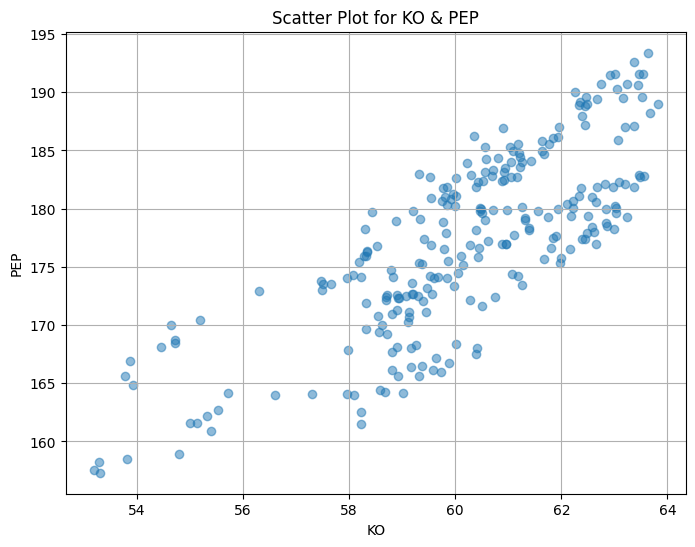

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(third_data['Adj Close_x'], third_data['Adj Close_y'], alpha=0.5)
plt.title("Scatter Plot for KO & PEP")
plt.xlabel('KO')
plt.ylabel('PEP')
plt.grid(True)
plt.show()

In [51]:
KO_close = df_KO['Adj Close']
PEP_close = df_PEP['Adj Close']

data = pd.DataFrame({'KO': KO_close, 'PEP': PEP_close})

data.corr()

data.cov()

,KO,PEP
KO,1.00,0.79
PEP,0.79,1.00


,KO,PEP
KO,5.33,14.19
PEP,14.19,60.46


In [59]:
KO_close.corr(PEP_close)

0.7906217618584824